In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Original dataset
df = pd.read_csv("/content/drive/MyDrive/ML - PROJECT/Phishing URL Detection/Dataset/url_original.csv")

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

domain    0
label     0
dtype: int64

In [ ]:
df['label'] = df['label'].astype(int)

In [ ]:
df.rename(columns={"domain": "url", "label": "phishing"}, inplace=True)

In [ ]:
df['url'] = 'https://' + df['url'].astype(str)

In [ ]:
df.drop_duplicates(inplace=True)

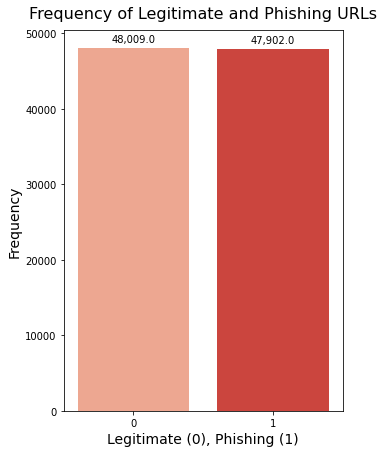

In [ ]:
plt.figure(figsize = (5, 7))
bar = sns.countplot(x=df["phishing"],
              data=df,
              palette="Reds")
for p in bar.patches:
    bar.annotate(format(p.get_height(), ','),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.title('Frequency of Legitimate and Phishing URLs', fontsize = 16, pad = 12)
plt.xlabel('Legitimate (0), Phishing (1)', fontsize = 14)
plt.ylabel("Frequency",fontsize = 14)
plt.show();

In [ ]:
import urllib
from urllib.parse import urlparse

In [ ]:
urls = [url for url in df['url']]

In [ ]:
df['protocol'],df['domain'],df['path'],df['query'],df['fragment'] = zip(*[urllib.parse.urlsplit(x) for x in urls])

In [ ]:
df.head()

In [ ]:
def get_features(df):
    needed_cols = ['url', 'domain', 'path', 'query', 'fragment']
    for col in needed_cols:
        df[f'{col}_length']=df[col].str.len()
        df[f'qty_dot_{col}'] = df[[col]].applymap(lambda x: str.count(x, '.'))
        df[f'qty_hyphen_{col}'] = df[[col]].applymap(lambda x: str.count(x, '-'))
        df[f'qty_slash_{col}'] = df[[col]].applymap(lambda x: str.count(x, '/'))
        df[f'qty_questionmark_{col}'] = df[[col]].applymap(lambda x: str.count(x, '?'))
        df[f'qty_equal_{col}'] = df[[col]].applymap(lambda x: str.count(x, '='))
        df[f'qty_at_{col}'] = df[[col]].applymap(lambda x: str.count(x, '@'))
        df[f'qty_and_{col}'] = df[[col]].applymap(lambda x: str.count(x, '&'))
        df[f'qty_exclamation_{col}'] = df[[col]].applymap(lambda x: str.count(x, '!'))
        df[f'qty_space_{col}'] = df[[col]].applymap(lambda x: str.count(x, ' '))
        df[f'qty_tilde_{col}'] = df[[col]].applymap(lambda x: str.count(x, '~'))
        df[f'qty_comma_{col}'] = df[[col]].applymap(lambda x: str.count(x, ','))
        df[f'qty_plus_{col}'] = df[[col]].applymap(lambda x: str.count(x, '+'))
        df[f'qty_asterisk_{col}'] = df[[col]].applymap(lambda x: str.count(x, '*'))
        df[f'qty_hashtag_{col}'] = df[[col]].applymap(lambda x: str.count(x, '#'))
        df[f'qty_dollar_{col}'] = df[[col]].applymap(lambda x: str.count(x, '$'))
        df[f'qty_percent_{col}'] = df[[col]].applymap(lambda x: str.count(x, '%'))

In [ ]:
get_features(df)

In [ ]:
num_cols = df.select_dtypes(exclude='object')

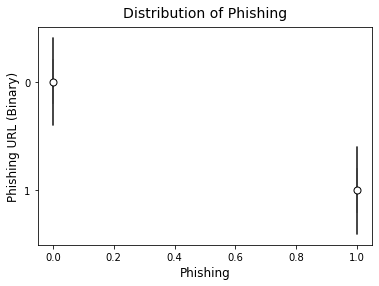

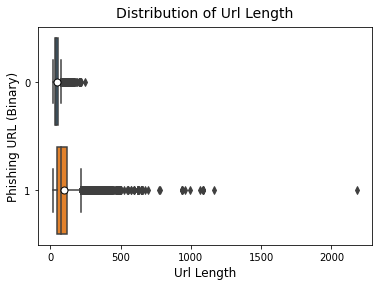

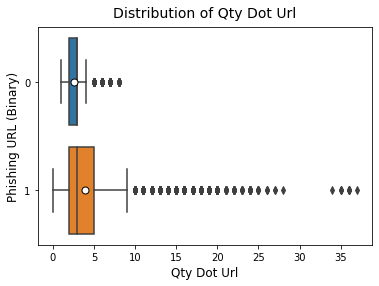

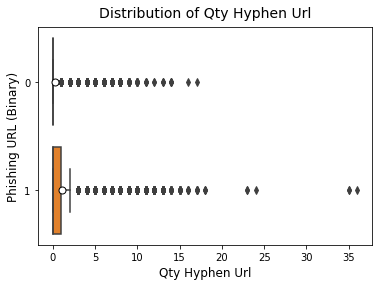

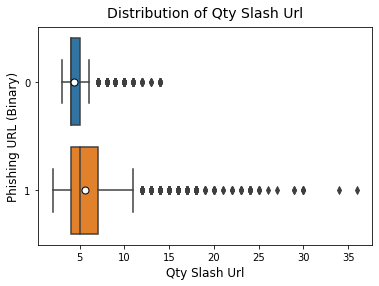

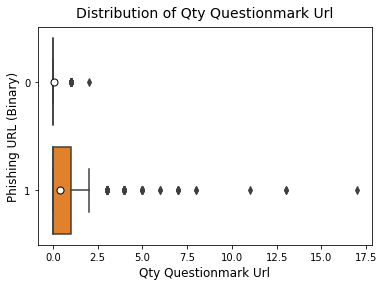

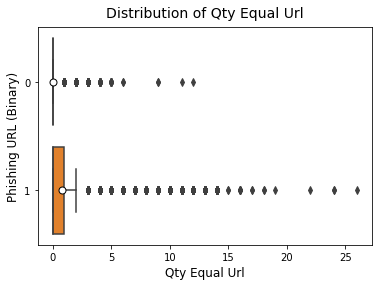

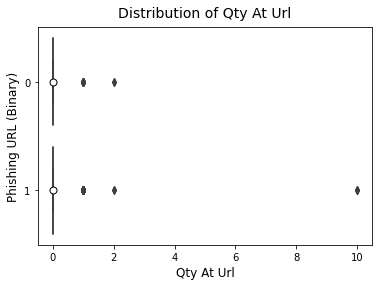

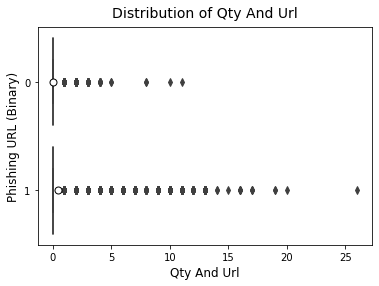

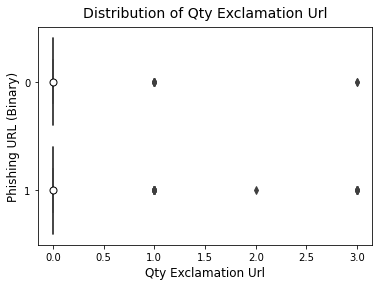

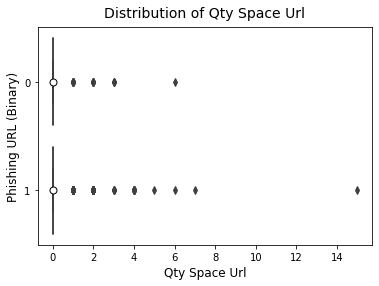

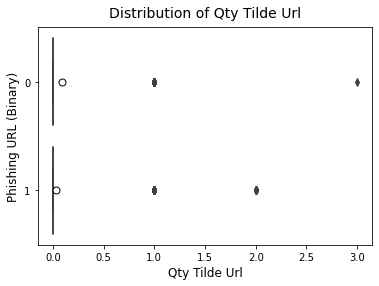

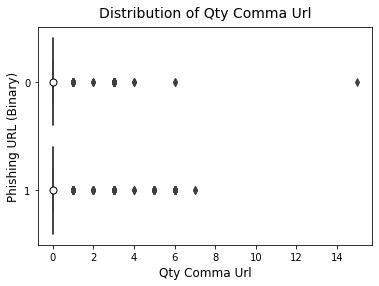

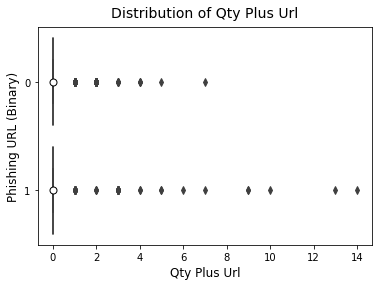

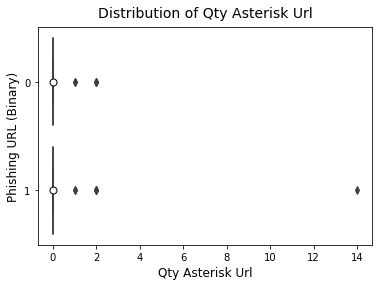

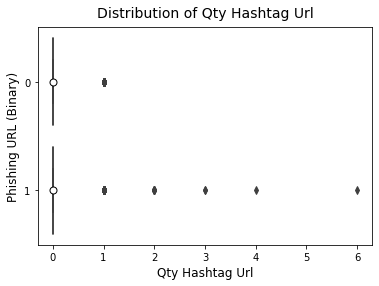

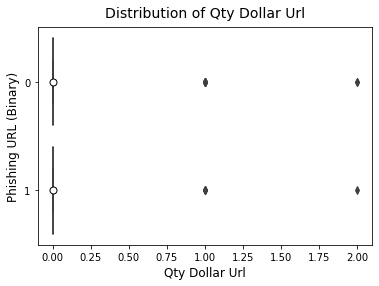

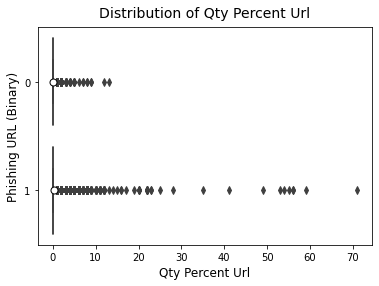

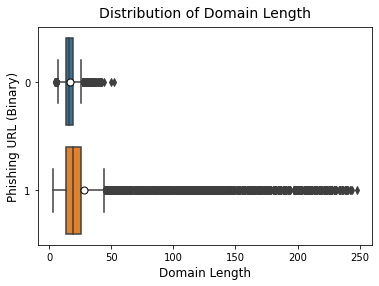

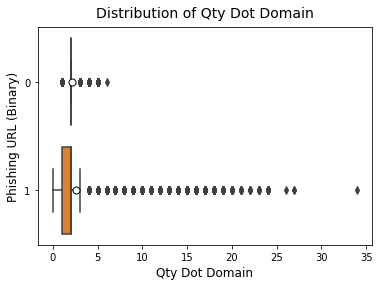

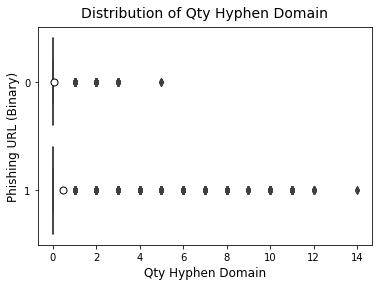

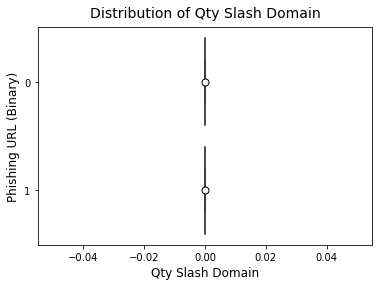

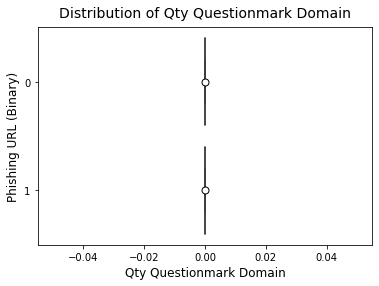

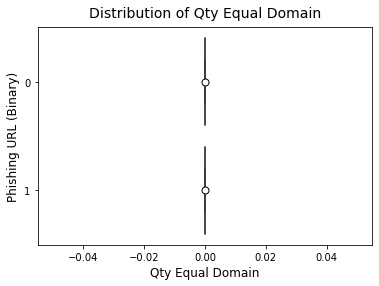

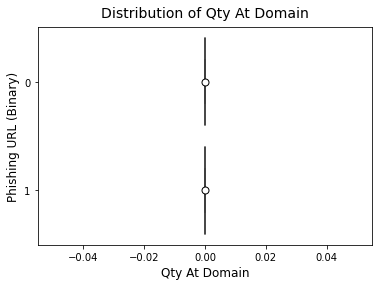

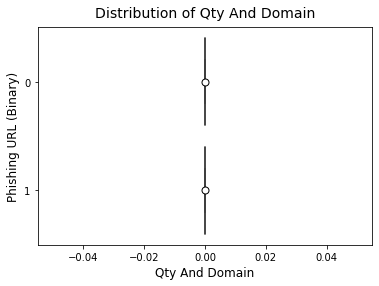

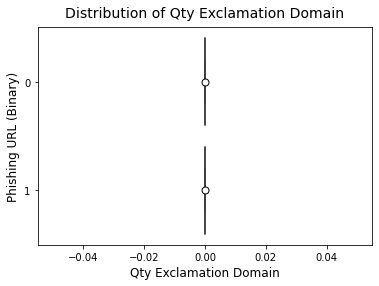

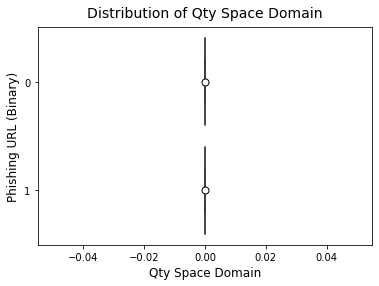

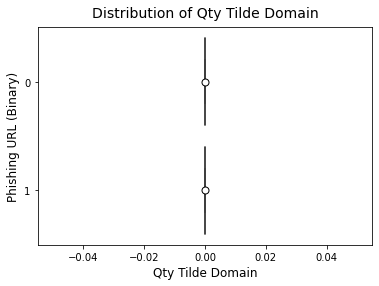

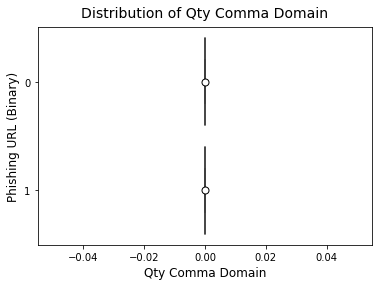

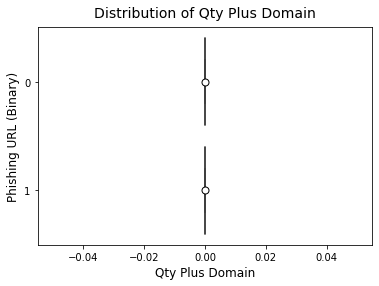

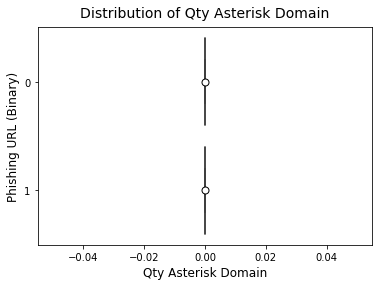

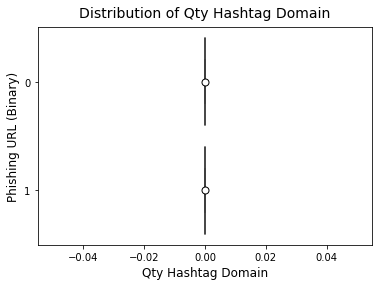

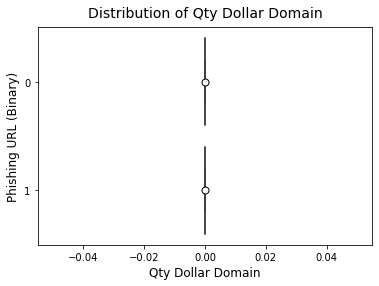

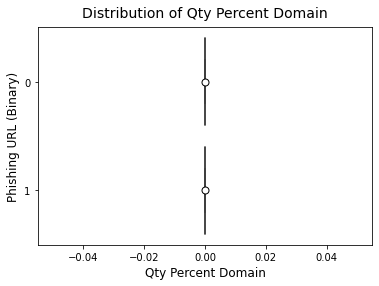

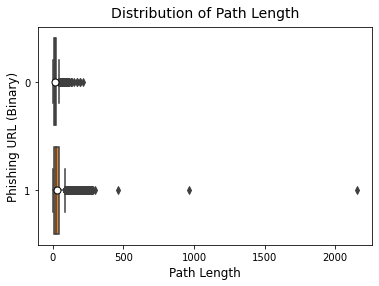

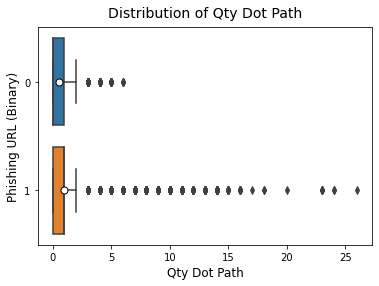

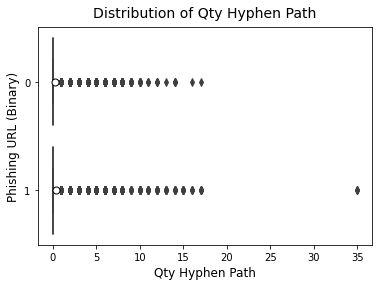

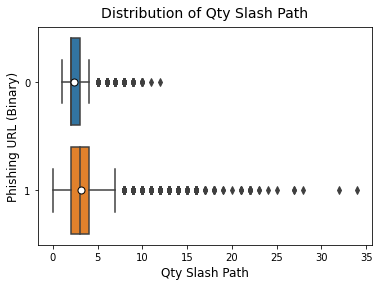

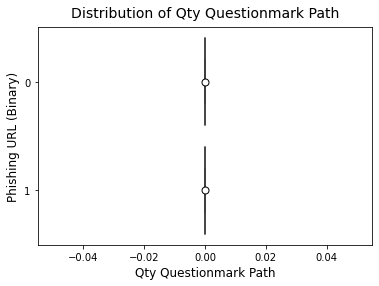

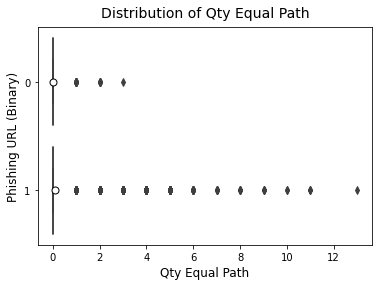

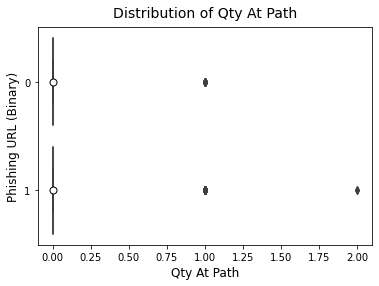

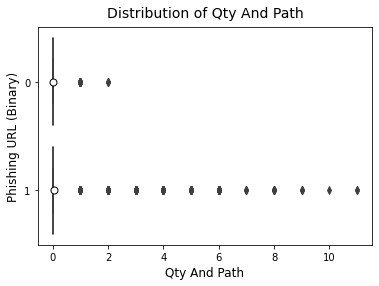

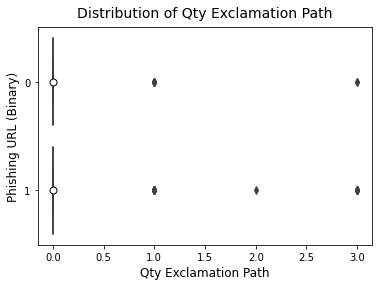

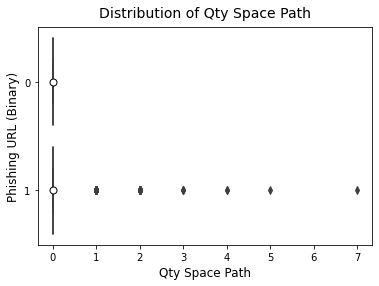

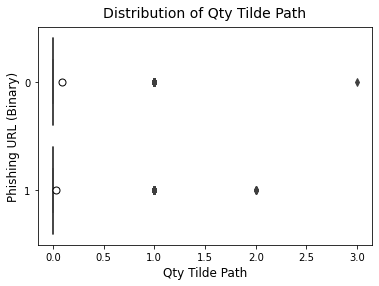

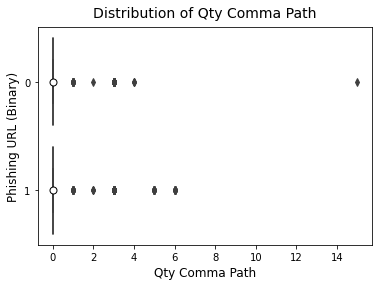

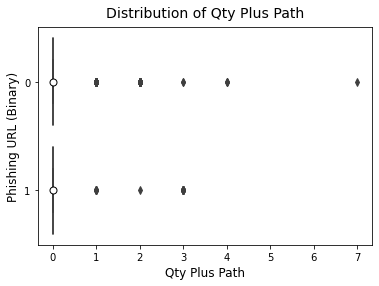

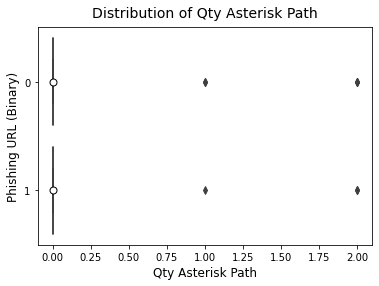

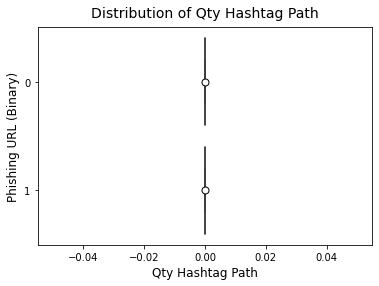

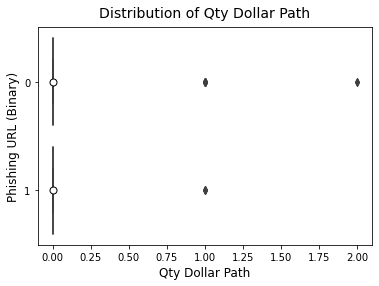

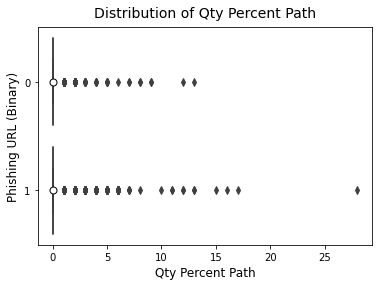

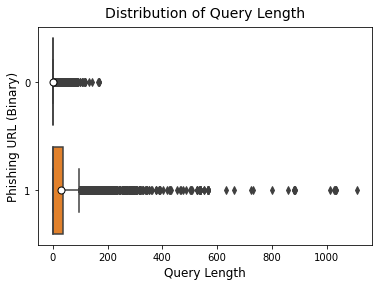

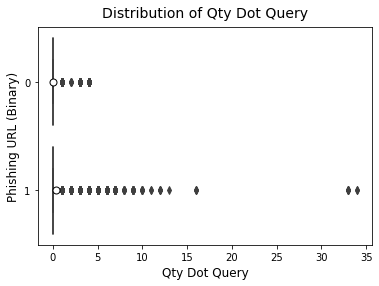

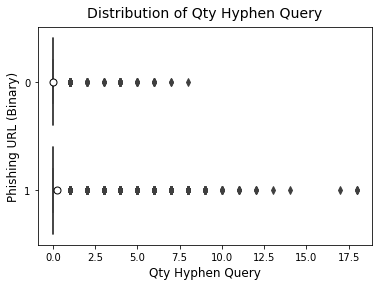

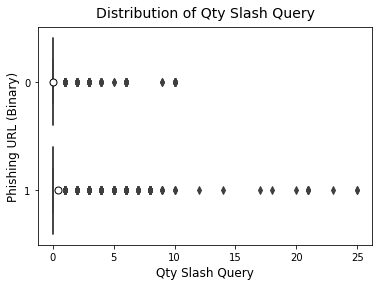

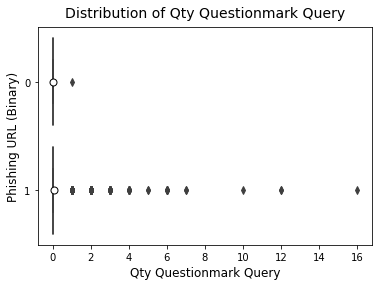

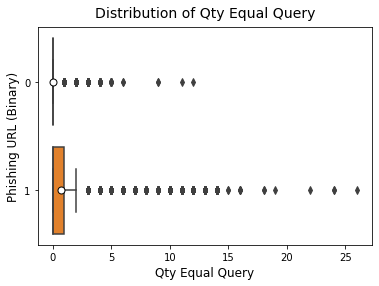

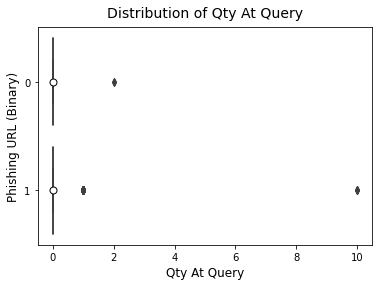

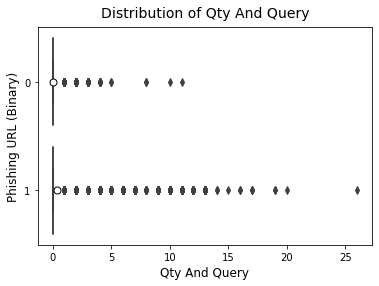

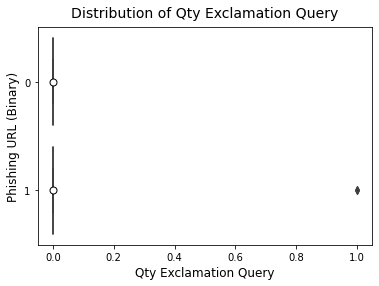

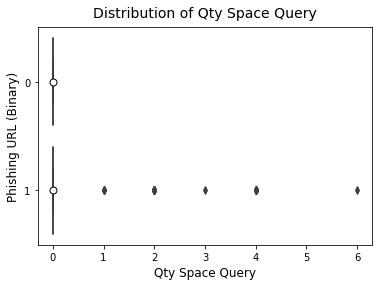

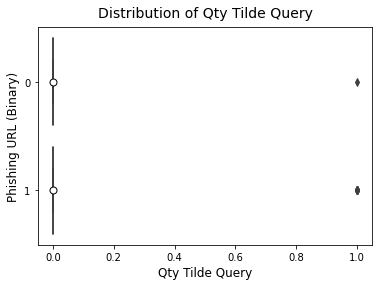

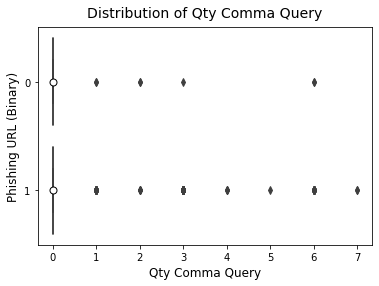

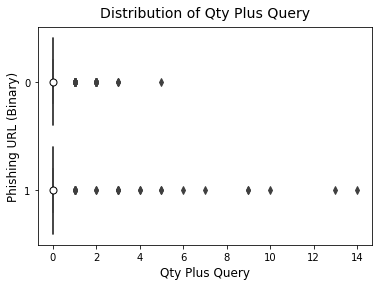

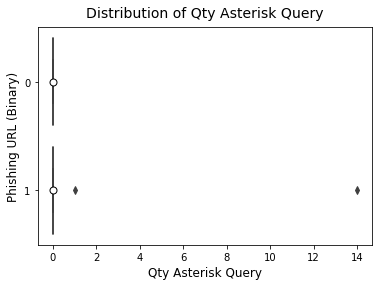

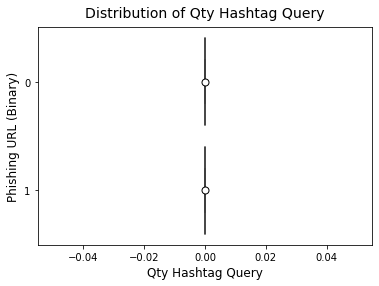

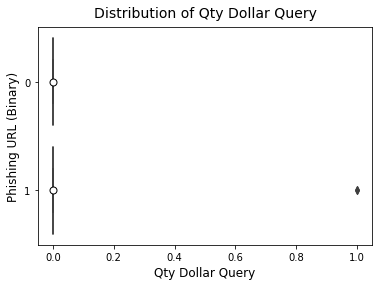

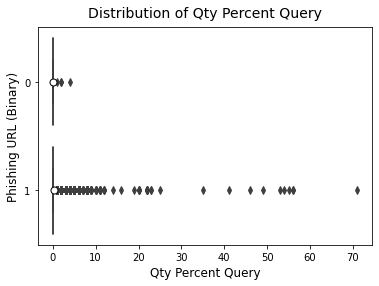

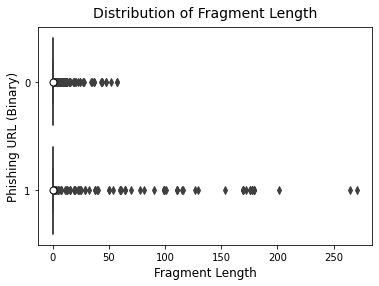

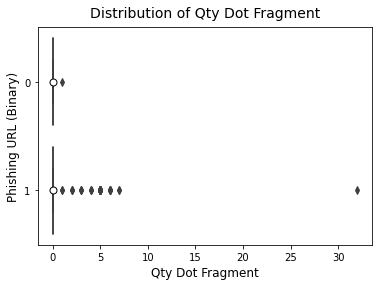

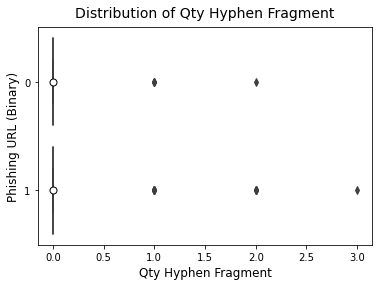

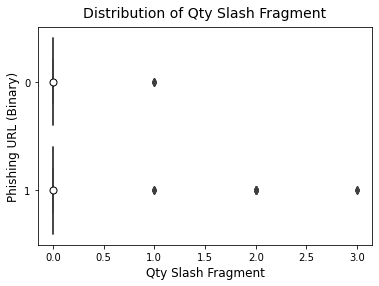

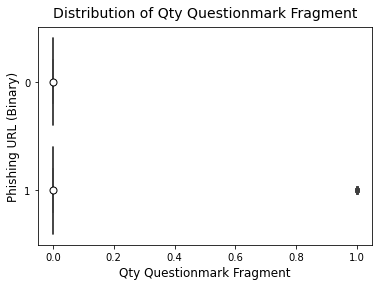

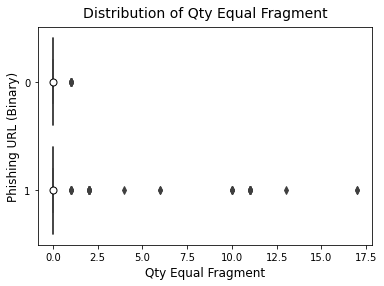

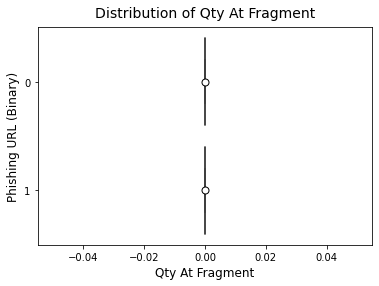

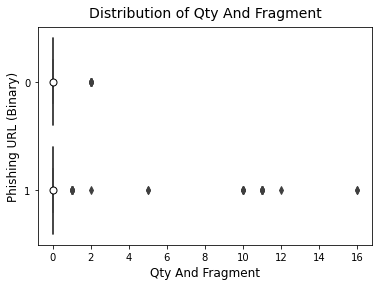

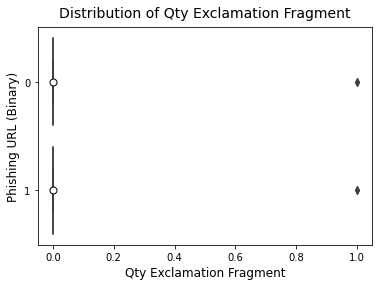

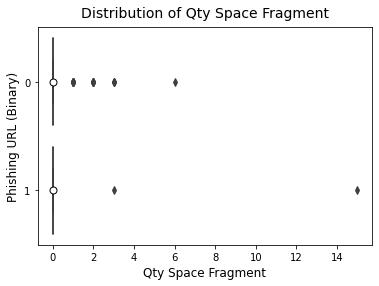

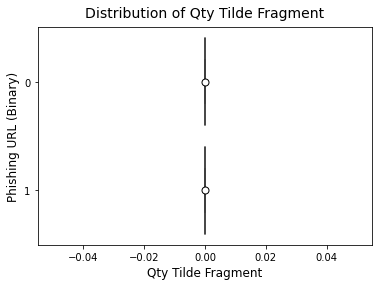

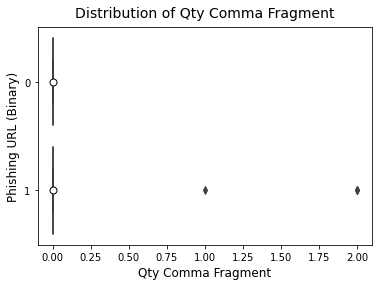

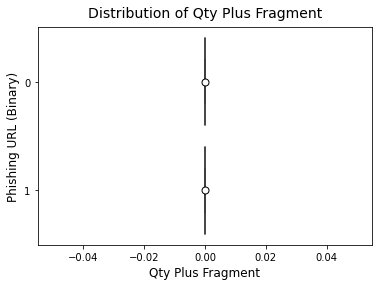

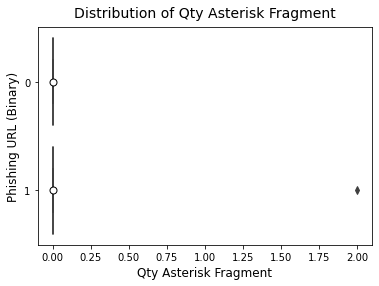

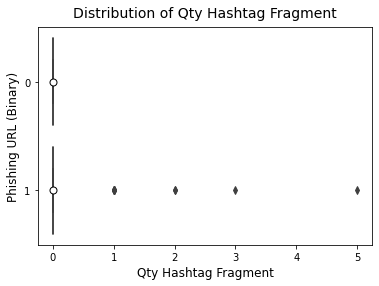

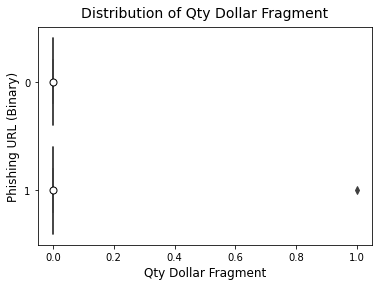

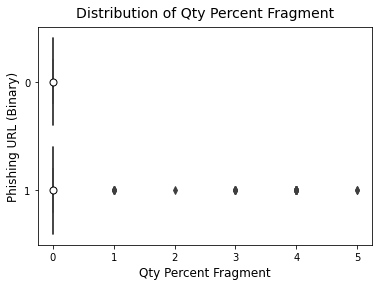

In [ ]:
for col in num_cols:
    column_name = col.title().replace('_', ' ')
    title = 'Distribution of ' + column_name
    sns.boxplot(x=df[col],
                y=df['phishing'],
                data=df,
                orient='h',
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white",
                           "markeredgecolor":"black",
                           "markersize":"7"})
    plt.xlabel(column_name, fontsize = 12)
    plt.ylabel('Phishing URL (Binary)', fontsize = 12)
    plt.title(title, fontsize = 14, pad = 10)
    plt.show();

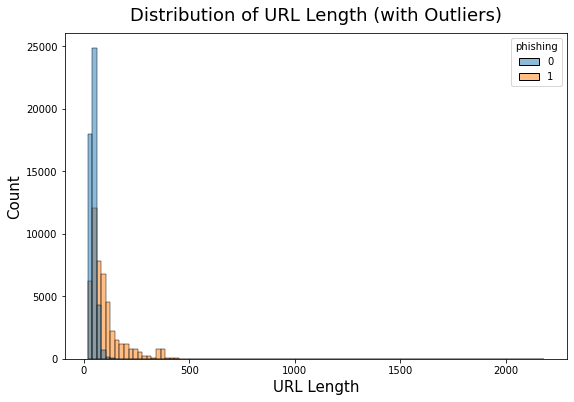

In [ ]:
plt.figure(figsize=(9,6))
sns.histplot(data=df, x=df["url_length"], hue = 'phishing', bins=100)
plt.title('Distribution of URL Length (with Outliers)', fontsize = 18, pad = 12)
plt.xlabel("URL Length", fontsize = 15)
plt.ylabel("Count",fontsize = 15);
plt.show()

In [ ]:
Q1 = df['url_length'].quantile(0.25)
Q3 = df['url_length'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_url_length = df[(df['url_length']> lower_bound)]
filtered_url_length = df[(df['url_length']< upper_bound)]

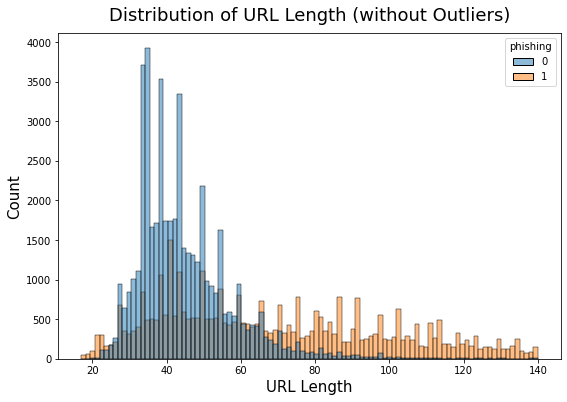

In [ ]:
plt.figure(figsize=(9,6))
sns.histplot(data=filtered_url_length, x="url_length", hue = 'phishing', bins = 100)
plt.title('Distribution of URL Length (without Outliers)', fontsize = 18, pad = 12)
plt.xlabel("URL Length", fontsize = 15)
plt.ylabel("Count",fontsize = 15);
plt.show()

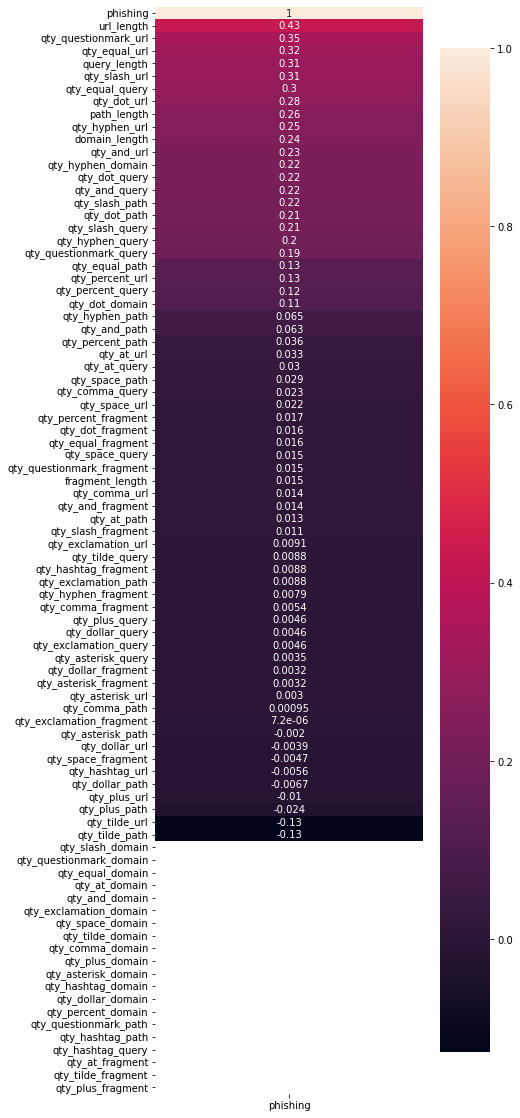

In [ ]:
plt.figure(figsize=(6,20))
sns.heatmap(df.corr()[['phishing']].sort_values('phishing', ascending=False), annot=True);

In [ ]:
col_in_question = ['qty_slash_domain', 'qty_questionmark_domain','qty_equal_domain', 'qty_at_domain', 'qty_and_domain',
 'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain','qty_comma_domain', 'qty_plus_domain',
 'qty_asterisk_domain','qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'qty_questionmark_path',
 'qty_hashtag_path', 'qty_hashtag_query', 'qty_at_fragment','qty_tilde_fragment', 'qty_plus_fragment']

In [ ]:
for col in col_in_question:
    print(df[col].value_counts())

0    95911
Name: qty_slash_domain, dtype: int64
0    95911
Name: qty_questionmark_domain, dtype: int64
0    95911
Name: qty_equal_domain, dtype: int64
0    95911
Name: qty_at_domain, dtype: int64
0    95911
Name: qty_and_domain, dtype: int64
0    95911
Name: qty_exclamation_domain, dtype: int64
0    95911
Name: qty_space_domain, dtype: int64
0    95911
Name: qty_tilde_domain, dtype: int64
0    95911
Name: qty_comma_domain, dtype: int64
0    95911
Name: qty_plus_domain, dtype: int64
0    95911
Name: qty_asterisk_domain, dtype: int64
0    95911
Name: qty_hashtag_domain, dtype: int64
0    95911
Name: qty_dollar_domain, dtype: int64
0    95911
Name: qty_percent_domain, dtype: int64
0    95911
Name: qty_questionmark_path, dtype: int64
0    95911
Name: qty_hashtag_path, dtype: int64
0    95911
Name: qty_hashtag_query, dtype: int64
0    95911
Name: qty_at_fragment, dtype: int64
0    95911
Name: qty_tilde_fragment, dtype: int64
0    95911
Name: qty_plus_fragment, dtype: int64


In [ ]:
df.drop(columns = col_in_question, inplace=True)

In [ ]:
print(df.shape)

(95911, 72)


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
import pickle

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import random
random.seed(42)

In [ ]:
df['phishing'].value_counts(normalize=True)

0    0.500558
1    0.499442
Name: phishing, dtype: float64

In [ ]:
X = df.drop(columns=['url', 'protocol', 'domain', 'path', 'query', 'fragment','phishing'])

y = df['phishing']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, stratify = y )

In [ ]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)

X_test_sc = ss.transform(X_test)

In [ ]:
def get_scores_sc(model):

    # instantiate model
    model = model()

    # fit to scaled data
    model.fit(X_train_sc, y_train)

    # make predictions
    preds = model.predict(X_test_sc)

    # print results
    print(f'{model} Training Score: {model.score(X_train_sc, y_train)}')
    print(f'{model} Testing Score: {model.score(X_test_sc, y_test)}')
    print()
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))

    return

In [ ]:
def get_scores(model):

    # instantiate model
    model = model()

    # fit to data
    model.fit(X_train, y_train)

    # make predictions
    preds = model.predict(X_test)

    # print results
    print(f'{model} Training Score: {model.score(X_train, y_train)}')
    print(f'{model} Testing Score: {model.score(X_test, y_test)}')
    print()
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))

    return

In [ ]:
get_scores_sc(LogisticRegression)

LogisticRegression() Training Score: 0.7967275103221053
LogisticRegression() Testing Score: 0.7921845024605889

              precision    recall  f1-score   support

           0       0.75      0.88      0.81     12002
           1       0.85      0.71      0.77     11976

    accuracy                           0.79     23978
   macro avg       0.80      0.79      0.79     23978
weighted avg       0.80      0.79      0.79     23978

[[10505  1497]
 [ 3486  8490]]


In [ ]:
get_scores_sc(KNeighborsClassifier)

KNeighborsClassifier() Training Score: 0.915435196641319
KNeighborsClassifier() Testing Score: 0.8858119943281342

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     12002
           1       0.91      0.86      0.88     11976

    accuracy                           0.89     23978
   macro avg       0.89      0.89      0.89     23978
weighted avg       0.89      0.89      0.89     23978

[[10925  1077]
 [ 1661 10315]]


In [ ]:
get_scores(DecisionTreeClassifier)

DecisionTreeClassifier() Training Score: 0.952580873868739
DecisionTreeClassifier() Testing Score: 0.8821002585703561

              precision    recall  f1-score   support

           0       0.86      0.91      0.89     12002
           1       0.91      0.85      0.88     11976

    accuracy                           0.88     23978
   macro avg       0.88      0.88      0.88     23978
weighted avg       0.88      0.88      0.88     23978

[[10968  1034]
 [ 1793 10183]]


In [ ]:
get_scores(BaggingClassifier)

BaggingClassifier() Training Score: 0.9492861412703488
BaggingClassifier() Testing Score: 0.8864375677704562

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     12002
           1       0.91      0.86      0.88     11976

    accuracy                           0.89     23978
   macro avg       0.89      0.89      0.89     23978
weighted avg       0.89      0.89      0.89     23978

[[10981  1021]
 [ 1702 10274]]


In [ ]:
get_scores(RandomForestClassifier)

RandomForestClassifier() Training Score: 0.9525669720434293
RandomForestClassifier() Testing Score: 0.8961131036783718

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     12002
           1       0.91      0.87      0.89     11976

    accuracy                           0.90     23978
   macro avg       0.90      0.90      0.90     23978
weighted avg       0.90      0.90      0.90     23978

[[11023   979]
 [ 1512 10464]]


Training Score: 0.9439200367008188
Testing Score: 0.8991992659938277

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     12002
           1       0.92      0.87      0.90     11976

    accuracy                           0.90     23978
   macro avg       0.90      0.90      0.90     23978
weighted avg       0.90      0.90      0.90     23978

[[11086   916]
 [ 1501 10475]]


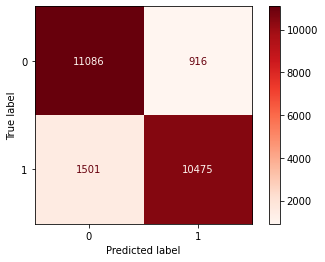

In [ ]:
rfc = RandomForestClassifier(n_estimators = 1400, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 90,
                             bootstrap= True, n_jobs= -1, random_state=42)
rfc.fit(X_train, y_train)

preds = rfc.predict(X_test)
print(f'Training Score: {rfc.score(X_train, y_train)}')
print(f'Testing Score: {rfc.score(X_test, y_test)}')
print()
print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfc.classes_)
disp.plot(cmap = 'Reds', values_format='');

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

print("Accuracy: ", (tn + tp) / (tn + fp + fn + tp))
print('Misclassification Rate: ', (fp+fn)/(tp+fp+tn+fn))
print("Recall: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))
print("Precision: ", tp / (tp + fp))

Accuracy:  0.8991992659938277
Misclassification Rate:  0.10080073400617233
Recall:  0.8746659986639946
Specificity:  0.9236793867688718
Precision:  0.9195856377842156


In [ ]:
pickle.dump(rfc, open('rfc.pkl','wb'))